<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Aplicando Python para análisis de precios: descarga, manejo y análisis de datos </font> </center>



<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
!pip install pandas_datareader

In [2]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
from pandas_datareader import data as web

In [3]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Ver la siguiente función...

In [4]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(tickers, start=start_date, end=end_date, data_source='yahoo')['Adj Close']
    closes = closes.sort_index()
    return closes

In [5]:
# Instrumentos a descargar (Apple, Walmart, IBM, Nike)
names = ['AAPL', 'WMT', 'IBM', 'NKE']

# Fechas: inicios 2011 a finales de 2015
start='2011-01-01'
end='2015-01-01'


In [6]:
# Obtenemos los precios ajustados en el cierre
closes = get_closes(names, start_date=start, end_date=end)
closes

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,10.106223,42.330910,102.657669,18.942732
2011-01-04,10.158967,42.493847,102.769035,18.476259
2011-01-05,10.242066,42.214531,102.358376,18.597269
2011-01-06,10.233790,41.865387,103.479050,18.430050
2011-01-07,10.307076,41.958504,102.970932,18.379440
...,...,...,...,...
2014-12-24,25.389597,74.138794,121.615677,44.770947
2014-12-26,25.838408,74.550537,122.006493,45.022026
2014-12-29,25.820274,74.318909,120.631134,45.240555


In [7]:
type(closes)

pandas.core.frame.DataFrame

In [8]:
closes.columns

Index(['AAPL', 'WMT', 'IBM', 'NKE'], dtype='object', name='Symbols')

In [9]:
closes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2011-01-03 to 2014-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1006 non-null   float64
 1   WMT     1006 non-null   float64
 2   IBM     1006 non-null   float64
 3   NKE     1006 non-null   float64
dtypes: float64(4)
memory usage: 39.3 KB


In [10]:
# Observemos los primeros datos
closes.head()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,10.106223,42.330910,102.657669,18.942732
2011-01-04,10.158967,42.493847,102.769035,18.476259
2011-01-05,10.242066,42.214531,102.358376,18.597269
2011-01-06,10.233790,41.865387,103.479050,18.430050
2011-01-07,10.307076,41.958504,102.970932,18.379440


In [11]:
# Observemos los últimos datos
closes.tail()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2014-12-24,25.389597,74.138794,121.615677,44.770947
2014-12-26,25.838408,74.550537,122.006493,45.022026
2014-12-29,25.820274,74.318909,120.631134,45.240555
2014-12-30,25.505198,74.447601,120.285431,45.045269
2014-12-31,25.020117,73.666985,120.578568,44.705860


¿Cómo lucen estos datos?

<AxesSubplot:xlabel='Date'>

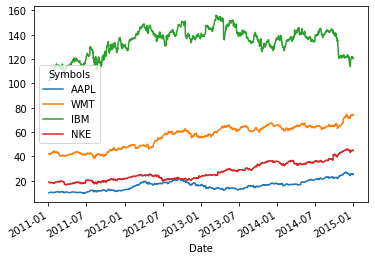

In [12]:
# Graficar
closes.plot()

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [13]:
# Método describe


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [14]:
closes.columns

Index(['AAPL', 'WMT', 'IBM', 'NKE'], dtype='object', name='Symbols')

In [15]:
closes_aapl = pd.DataFrame(closes['AAPL'])
type(closes_aapl)

pandas.core.frame.DataFrame

In [16]:
closes_aapl["Rendimiento"] = closes_aapl["AAPL"]
closes_aapl["Rendimiento"].iloc[1:] = closes_aapl["Rendimiento"].iloc[:-1]
closes_aapl["Rendimiento"].iloc[0] = 0
closes_aapl["Rendimiento"] = closes_aapl["AAPL"]/closes_aapl["Rendimiento"]-1
closes_aapl

,AAPL,Rendimiento
Date,,
2011-01-03,10.106223,inf
2011-01-04,10.158967,0.005219
2011-01-05,10.242066,0.008180
2011-01-06,10.233790,-0.000808
2011-01-07,10.307076,0.007161
...,...,...
2014-12-24,25.389597,-0.004709
2014-12-26,25.838408,0.017677
2014-12-29,25.820274,-0.000702


In [17]:
closes_aapl.pct_change()

,AAPL,Rendimiento
Date,,
2011-01-03,NaN,NaN
2011-01-04,0.005219,-1.000000
2011-01-05,0.008180,0.567345
2011-01-06,-0.000808,-1.098783
2011-01-07,0.007161,-9.862312
...,...,...
2014-12-24,-0.004709,0.329607
2014-12-26,0.017677,-4.753701
2014-12-29,-0.000702,-1.039701


In [25]:
# Método pct_change
returns = closes.pct_change()
returns

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006549
2011-01-06,-0.000808,-0.008271,0.010949,-0.008992
2011-01-07,0.007161,0.002224,-0.004910,-0.002746
...,...,...,...,...
2014-12-24,-0.004709,-0.002654,-0.002589,0.003334
2014-12-26,0.017677,0.005554,0.003214,0.005608
2014-12-29,-0.000702,-0.003107,-0.011273,0.004854


In [26]:
returns = returns.dropna()
returns

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006549
2011-01-06,-0.000808,-0.008271,0.010949,-0.008992
2011-01-07,0.007161,0.002224,-0.004910,-0.002746
2011-01-10,0.018833,-0.006472,-0.001961,0.007662
...,...,...,...,...
2014-12-24,-0.004709,-0.002654,-0.002589,0.003334
2014-12-26,0.017677,0.005554,0.003214,0.005608
2014-12-29,-0.000702,-0.003107,-0.011273,0.004854


y la gráfica de los rendimientos se puede obtener como...

<AxesSubplot:xlabel='Date'>

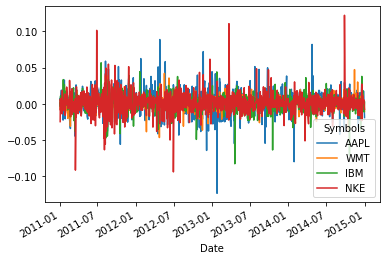

In [28]:
# Gráfica
returns.plot()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [29]:
# Generación de elementos
x=np.linspace(-0.9,1)
y1 = x
y2 = np.log(1+x)


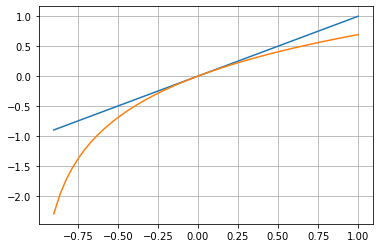

In [30]:
plt.plot(x,y1,x,y2)
plt.grid()

In [31]:
# Rendimiento logarítmico
log_returns = np.log(closes/closes.shift()).dropna()
log_returns

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005205,0.003842,0.001084,-0.024934
2011-01-05,0.008147,-0.006595,-0.004004,0.006528
2011-01-06,-0.000808,-0.008305,0.010889,-0.009032
2011-01-07,0.007136,0.002222,-0.004922,-0.002750
2011-01-10,0.018657,-0.006493,-0.001963,0.007633
...,...,...,...,...
2014-12-24,-0.004720,-0.002658,-0.002592,0.003329
2014-12-26,0.017523,0.005538,0.003208,0.005592
2014-12-29,-0.000702,-0.003112,-0.011337,0.004842


<AxesSubplot:xlabel='Date'>

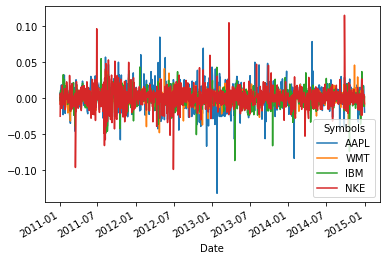

In [32]:
# Gráfica
log_returns.plot()

In [33]:
# Valor absoluto de la diferencia
np.abs(returns - log_returns)

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,1.357154e-05,0.000007,5.880045e-07,0.000308
2011-01-05,3.327408e-05,0.000022,8.005135e-06,0.000021
2011-01-06,3.266392e-07,0.000034,5.950129e-05,0.000041
2011-01-07,2.551885e-05,0.000002,1.209535e-05,0.000004
2011-01-10,1.751378e-04,0.000021,1.924718e-06,0.000029
...,...,...,...,...
2014-12-24,1.112324e-05,0.000004,3.356795e-06,0.000006
2014-12-26,1.544201e-04,0.000015,5.152355e-06,0.000016
2014-12-29,2.463706e-07,0.000005,6.401994e-05,0.000012


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [34]:
# Media y volatilidad de rendimientos
returns.mean()


Symbols
AAPL    0.001043
WMT     0.000594
IBM     0.000230
NKE     0.000970
dtype: float64

In [35]:
returns.std()

Symbols
AAPL    0.016763
WMT     0.009271
IBM     0.011811
NKE     0.015208
dtype: float64

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.